## Theoretical Background

The probability density $ |\Psi|^2 $ of the hydrogen atom's electron is calculated using the wave function $ \Psi $, which is a product of the radial and angular parts. The radial part depends on the principal and azimuthal quantum numbers \( n \) and \( l \), while the angular part depends on the azimuthal and magnetic quantum numbers \( l \) and \( m \).

### Radial Part

The radial part of the wave function is given by:

$$ R_{nl}(r) = \sqrt{\left(\frac{2}{n a_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]^3}} e^{- \frac{r}{n a_0}} \left(\frac{2r}{n a_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{n a_0}\right) $$

where \( L \) are the generalized Laguerre polynomials and $ a_0 $ is the Bohr radius.

### Angular Part

The angular part of the wave function is given by the spherical harmonics:

$$ Y_{lm}(\theta, \phi) = (-1)^{\frac{m + |m|}{2}} \sqrt{\frac{(2l + 1)}{4\pi} \frac{(l - |m|)!}{(l + |m|)!}} P_l^{|m|}(\cos \theta) e^{im\phi} $$

where $ P_l^m $ are the associated Legendre polynomials.

### Probability Density

The probability density $ \ |\Psi|^2 \ $ is the product of the square of the radial part and the square of the absolute value of the angular part:

$$ |\Psi|^2 = |R_{nl}(r) Y_{lm}(\theta, \phi)|^2 $$

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm, genlaguerre, factorial

**Radial Part Plot:** This graph shows the radial component of the wave function for the specified quantum numbers. The x-axis represents the radius (in units of the Bohr radius, $ a_0 $), and the y-axis shows the amplitude of the radial part.

In [36]:
def plot_radial_part(n, l, a0=1.0):
    """
    Plot the radial part of the wave function for the hydrogen atom.

    Parameters:
    n (int): Principal quantum number
    l (int): Azimuthal quantum number
    a0 (float): Bohr radius (default is 1.0)

    Returns:
    None. Directly displays the plot.
    """
    # Define the range of r
    r = np.linspace(0, 20*a0, 400)

    # Radial part calculation
    rho = 2 * r / n / a0
    normalization_factor = np.sqrt((2.0 / (n * a0))**3 * factorial(n - l - 1) / (2.0 * n * factorial(n + l)**3))
    radial_part = normalization_factor * np.exp(-rho / 2) * rho**l * genlaguerre(n - l - 1, 2 * l + 1)(rho)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(r, radial_part)
    plt.title(f'Radial Part of Wave Function (n={n}, l={l})')
    plt.xlabel('Radius (in a0 units)')
    plt.ylabel('Radial Part')
    plt.grid(True)
    plt.show()

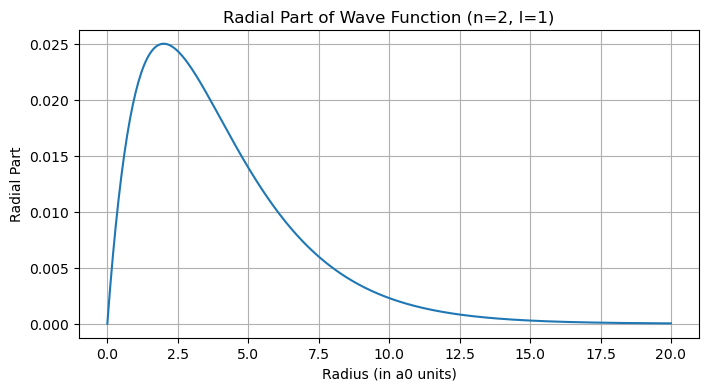

In [35]:
# Plot the radial part for n=2, l=1
plot_radial_part(2, 1)

**Angular Part Plot:** This polar plot visualizes the angular component of the wave function. The plot shows how the probability density varies with the angles $\theta$ and $\phi$, providing insight into the shape and orientation of the orbital.

In [38]:
def plot_angular_part(l, m): ### ϕ, θ and ϕ
    """
    Plot the angular part of the wave function for the hydrogen atom.

    Parameters:
    l (int): Azimuthal quantum number
    m (int): Magnetic quantum number

    Returns:
    None. Directly displays the plot.
    """
    # Define the range of theta and phi
    theta = np.linspace(0, np.pi, 100)
    phi = np.linspace(0, 2 * np.pi, 100)
    Theta, Phi = np.meshgrid(theta, phi)

    # Angular part calculation
    angular_part = np.abs(sph_harm(m, l, Phi, Theta))**2

    # Plot
    plt.figure(figsize=(8, 8))
    plt.subplot(projection="polar")
    plt.pcolormesh(Phi, Theta, angular_part)
    plt.title(f'Angular Part of Wave Function (l={l}, m={m})')
    plt.grid(True)
    plt.show()

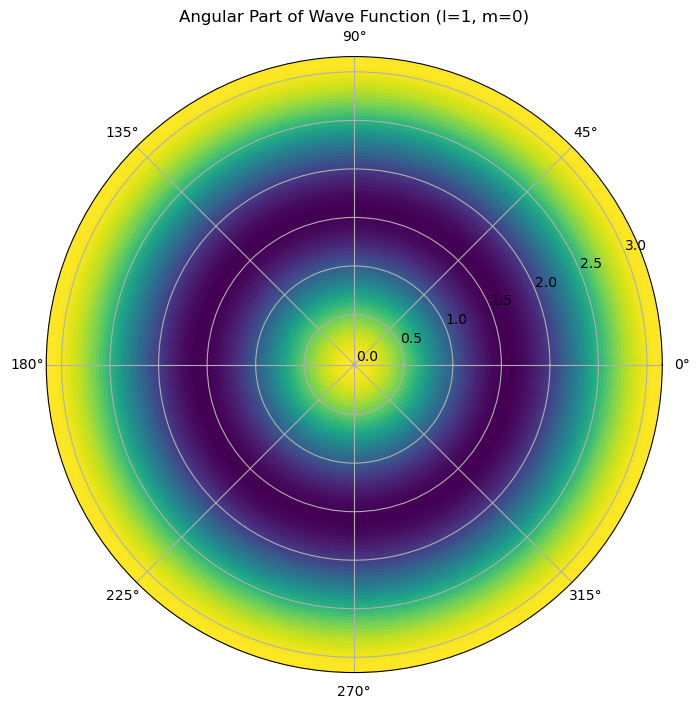

In [39]:
# Plot the angular part for l=1, m=0
plot_angular_part(1, 0)

**2D Probability Density Calculation (n, l, m):** This function computes the 2D probability density of a hydrogen atom's orbital for specified quantum numbers *n*, *l*, and *m*. It generates a 2D grid representing a cross-section of space around the atom. The x and y axes correspond to coordinates in this plane, scaled by the Bohr radius $a_0$. 

The function then transforms these coordinates into spherical coordinates and calculates the probability density at each point by combining the radial and angular components of the hydrogen atom's wave function. This density is representative of where an electron is likely to be found in a particular orbital. The grid size parameter allows for control over the resolution of the computation.

In [3]:
def calculate_hydrogen_density_2d(n, l, m, a0=1.0, grid_size=100):
    """
    Calculate the 2D probability density of a hydrogen atom orbital.

    Parameters:
    n (int): Principal quantum number (defines the energy level).
    l (int): Azimuthal quantum number (defines the shape of the orbital).
    m (int): Magnetic quantum number (defines the orientation of the orbital).
    a0 (float): Bohr radius (default is 1.0).
    grid_size (int): Resolution of the grid for calculations.

    Returns:
    X, Y, density: 2D arrays representing the X, Y coordinates and the corresponding probability density.
    """
    # Generate grid
    x = np.linspace(-10*a0, 10*a0, grid_size)
    y = np.linspace(-10*a0, 10*a0, grid_size)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)  # 2D plane cross-section at Z=0

    # Convert to spherical coordinates
    R = np.sqrt(X**2 + Y**2 + Z**2)
    Theta = np.arctan2(np.sqrt(X**2 + Y**2), Z)
    Phi = np.arctan2(Y, X)

    # Radial part of the wave function
    rho = 2 * R / n / a0
    radial_part = np.exp(-rho / 2) * rho**l

    # Angular part of the wave function
    angular_part = np.abs(sph_harm(m, l, Phi, Theta))**2

    # Probability density
    density = radial_part * angular_part

    return X, Y, density

def plot_hydrogen_density_2d(X, Y, density):
    """
    Plot the 2D probability density of the hydrogen atom orbital.

    Parameters:
    X, Y: 2D arrays representing the X and Y coordinates.
    density: 2D array representing the probability density at each (X, Y) coordinate.

    Returns:
    None. The function directly displays the plot.
    """
    plt.figure(figsize=(6, 6))
    plt.pcolormesh(X, Y, density, shading='auto')
    plt.colorbar(label='Probability Density')
    plt.title('Hydrogen Atom Orbital (2D cross-section)')
    plt.xlabel('x (in a0 units)')
    plt.ylabel('y (in a0 units)')
    plt.axis('equal')
    plt.show()

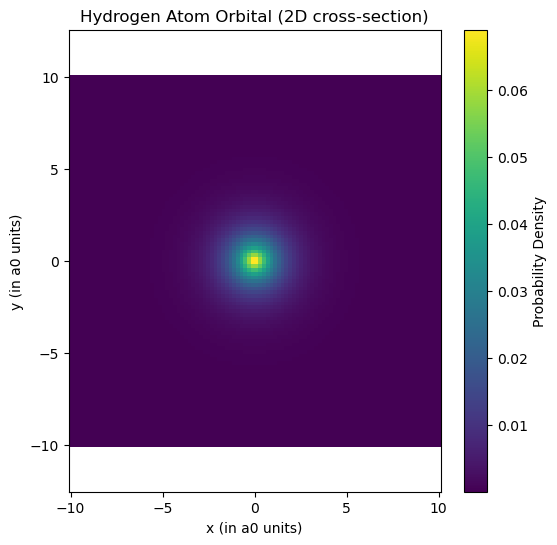

In [5]:
# Plot the 1s and 2p orbitals in 2D
X, Y, density = calculate_hydrogen_density_2d(1, 0, 0)
plot_hydrogen_density_2d(X, Y, density) # 1s orbital

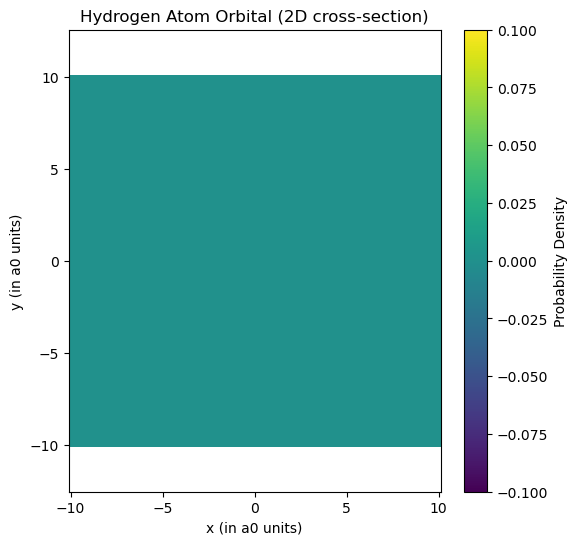

In [6]:
X, Y, density = calculate_hydrogen_density_2d(2, 1, 0)
plot_hydrogen_density_2d(X, Y, density) # 2p orbital with m=0

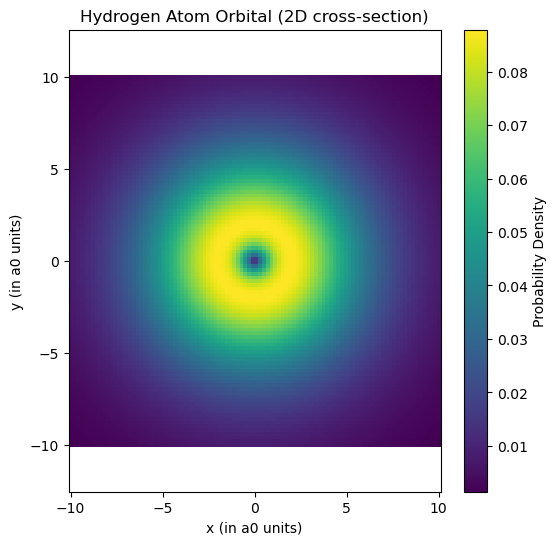

In [7]:
X, Y, density = calculate_hydrogen_density_2d(2, 1, 1)
plot_hydrogen_density_2d(X, Y, density) # 2p orbital with m=1

**3D Probability Density Calculation (n, l, m):** This function extends the 2D probability density calculation into three dimensions. It creates a 3D grid in space around the hydrogen atom and, like its 2D counterpart, calculates the probability density at each point based on the quantum numbers n, l, and m. 

The radial and angular parts of the wave function are used to compute this density, providing a 3D visualization of the electron's probable location in a particular orbital. The grid size parameter affects the detail and extent of the 3D space being modeled. This function is particularly useful for visualizing the complex shapes of electron orbitals in three dimensions.

In [8]:
def calculate_hydrogen_density_3d(n, l, m, a0=1.0, grid_size=50):
    """
    Calculate the 3D probability density of a hydrogen atom orbital.

    Parameters:
    n (int): Principal quantum number (defines the energy level).
    l (int): Azimuthal quantum number (defines the shape of the orbital).
    m (int): Magnetic quantum number (defines the orientation of the orbital).
    a0 (float): Bohr radius (default is 1.0).
    grid_size (int): Resolution of the grid for calculations.

    Returns:
    X, Y, Z, density: 3D arrays representing the X, Y, Z coordinates and the corresponding probability density.
    """
    # Generate 3D grid
    x = np.linspace(-10*a0, 10*a0, grid_size)
    y = np.linspace(-10*a0, 10*a0, grid_size)
    z = np.linspace(-10*a0, 10*a0, grid_size)
    X, Y, Z = np.meshgrid(x, y, z)

    # Convert to spherical coordinates
    R = np.sqrt(X**2 + Y**2 + Z**2)
    Theta = np.arctan2(np.sqrt(X**2 + Y**2), Z)
    Phi = np.arctan2(Y, X)

    # Radial part of the wave function
    rho = 2 * R / n / a0
    radial_part = np.exp(-rho / 2) * rho**l

    # Angular part of the wave function
    angular_part = np.abs(sph_harm(m, l, Phi, Theta))**2

    # Probability density
    density = radial_part * angular_part

    return X, Y, Z, density

def plot_hydrogen_density_3d(X, Y, Z, density, threshold=0.05):
    """
    Plot the 3D probability density of the hydrogen atom orbital.

    Parameters:
    X, Y, Z: 3D arrays representing the X, Y, and Z coordinates.
    density: 3D array representing the probability density at each (X, Y, Z) coordinate.
    threshold (float): A threshold for filtering out low-density points for clarity.

    Returns:
    None. The function directly displays the plot.
    """
    mask = density > density.max() * threshold

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[mask], Y[mask], Z[mask], c=density[mask], marker='o', s=1)
    ax.set_title('Hydrogen Atom Orbital (3D Visualization)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

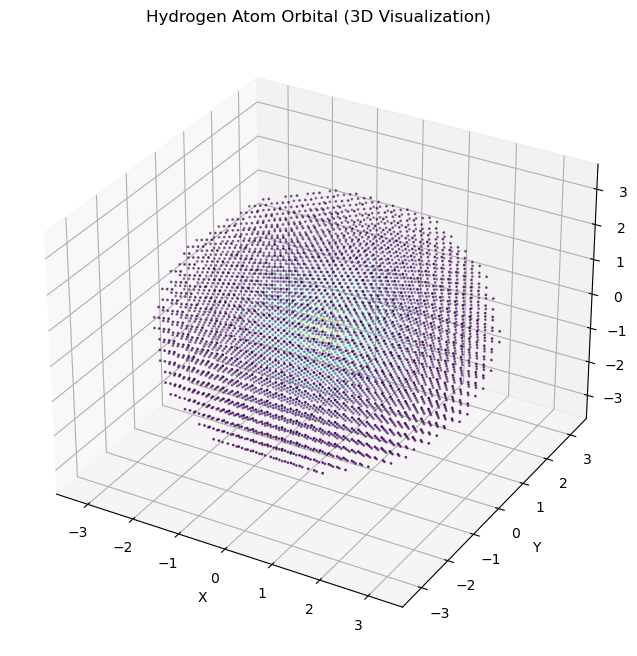

In [52]:
gs = 66

# Plot the 1s orbital in 3D
X, Y, Z, density = calculate_hydrogen_density_3d(1, 0, 0, grid_size=gs)
plot_hydrogen_density_3d(X, Y, Z, density)

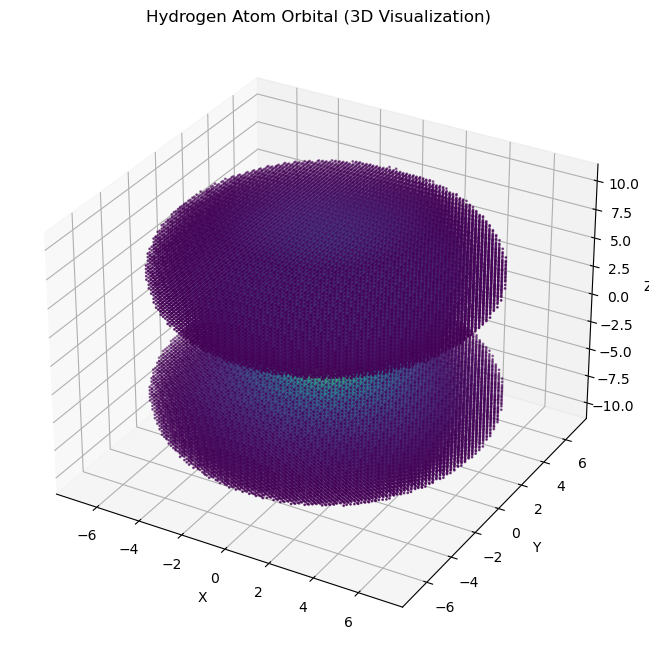

In [53]:
# Plot the 1s orbital in 3D
X, Y, Z, density = calculate_hydrogen_density_3d(2, 1, 0, grid_size=gs)
plot_hydrogen_density_3d(X, Y, Z, density)

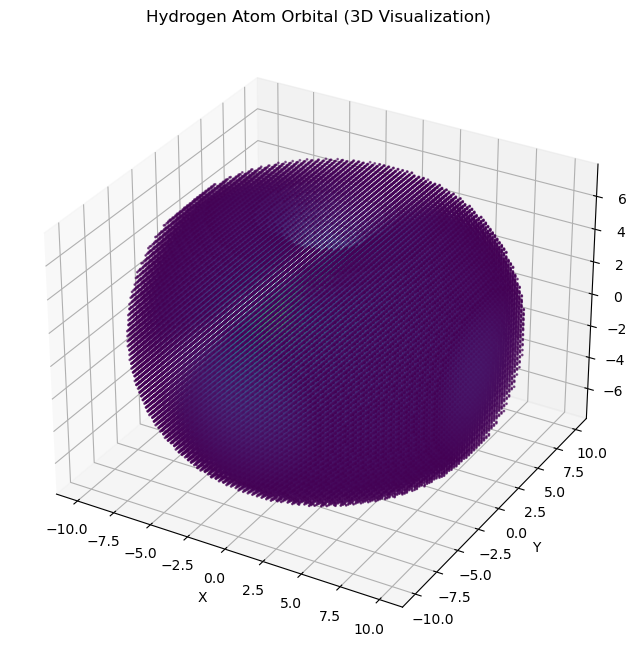

In [54]:
# Plot the 1s orbital in 3D
X, Y, Z, density = calculate_hydrogen_density_3d(2, 1, 1, grid_size=gs)
plot_hydrogen_density_3d(X, Y, Z, density)

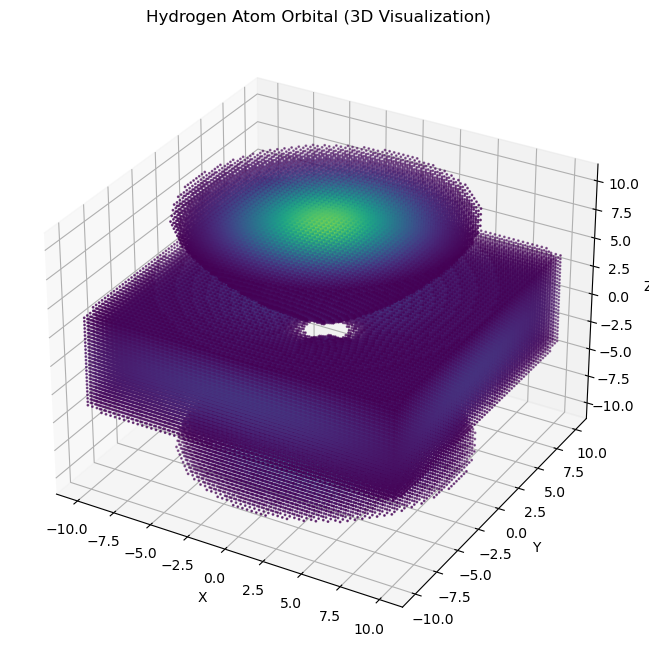

In [55]:
# Plot the 1s orbital in 3D
X, Y, Z, density = calculate_hydrogen_density_3d(3, 2, 0, grid_size=gs)
plot_hydrogen_density_3d(X, Y, Z, density)

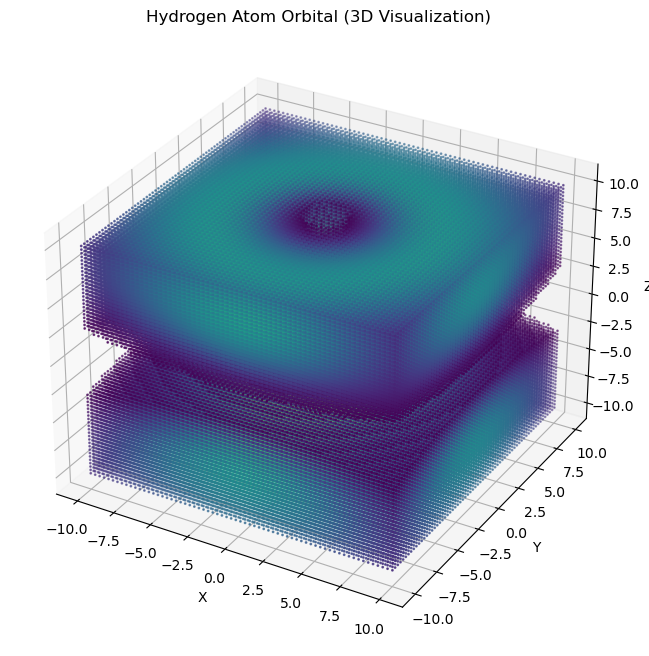

In [56]:
# Plot the 1s orbital in 3D
X, Y, Z, density = calculate_hydrogen_density_3d(3, 2, 1, grid_size=gs)
plot_hydrogen_density_3d(X, Y, Z, density)

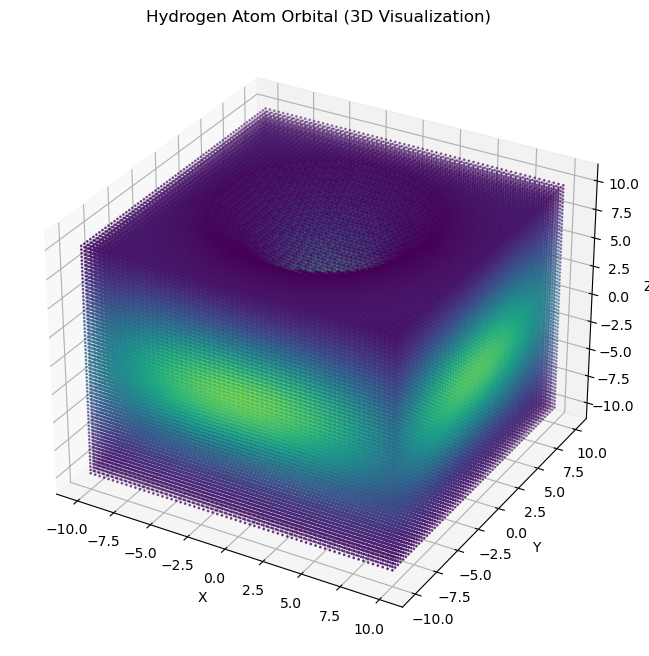

In [57]:
# Plot the 1s orbital in 3D
X, Y, Z, density = calculate_hydrogen_density_3d(3, 2, 2, grid_size=gs)
plot_hydrogen_density_3d(X, Y, Z, density)

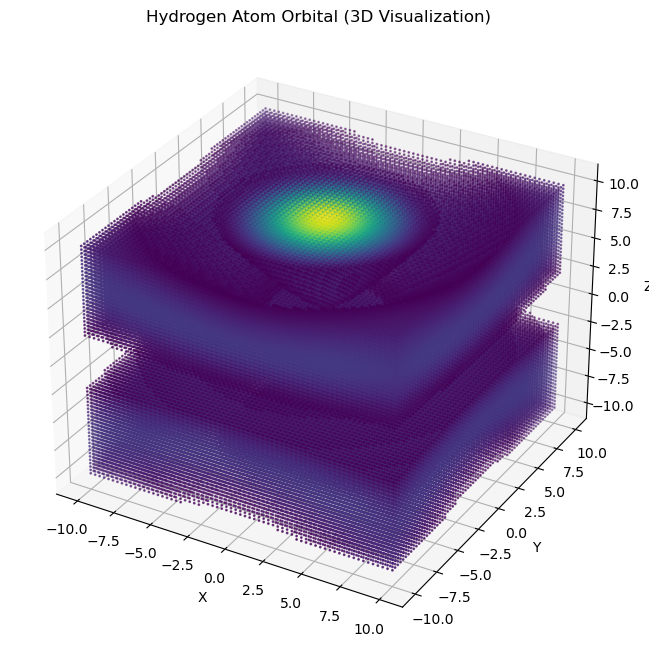

In [58]:
# Plot the 1s orbital in 3D
X, Y, Z, density = calculate_hydrogen_density_3d(4, 3, 0, grid_size=gs)
plot_hydrogen_density_3d(X, Y, Z, density)

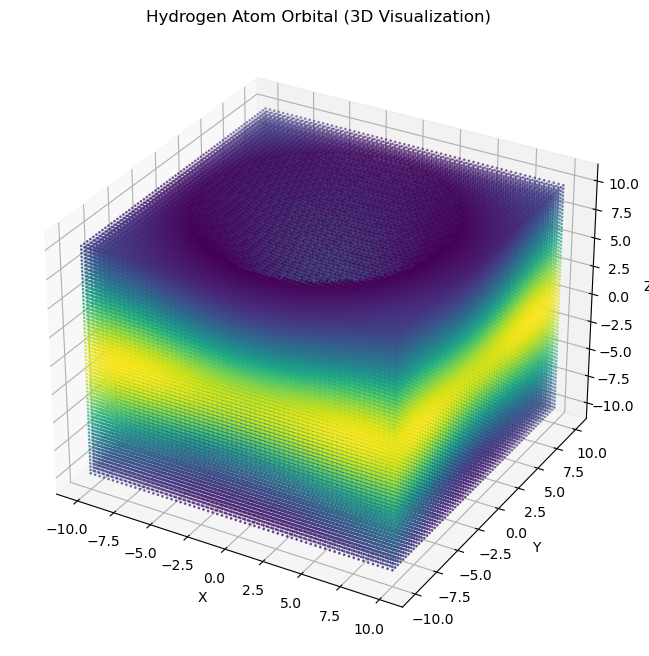

In [59]:
# Plot the 1s orbital in 3D
X, Y, Z, density = calculate_hydrogen_density_3d(4, 3, 3, grid_size=gs)
plot_hydrogen_density_3d(X, Y, Z, density)

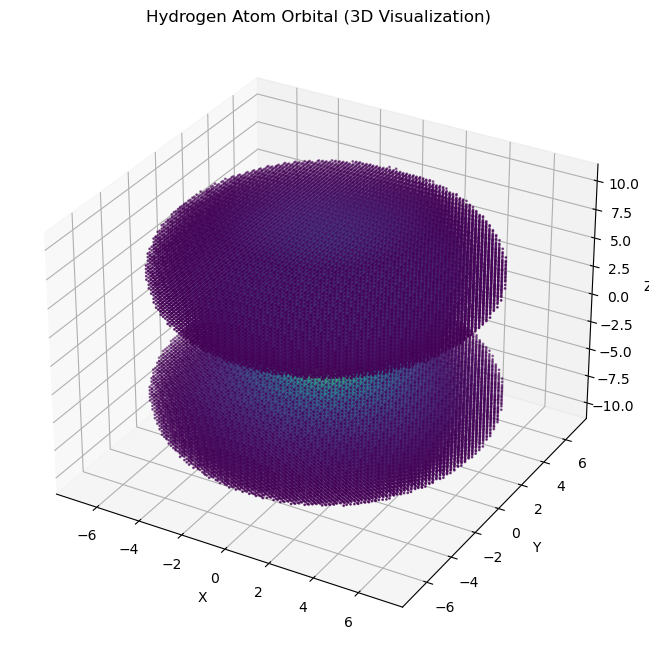

In [60]:
# Plot the 1s orbital in 3D
X, Y, Z, density = calculate_hydrogen_density_3d(2, 1, 0, grid_size=gs)
plot_hydrogen_density_3d(X, Y, Z, density)